<a href="https://colab.research.google.com/github/leekwanghun323/python/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%95%88%EB%A9%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# 코랩 그래프에서 한글 설정 방법 

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


# 위 3줄 실행 후 Runtime - Restart - Runtime



In [71]:
#id : 804oegVah0qTIBSTwQfQ
# 시클릿 : YM6jY1esfD

# 필요 모듈 읽어오기
import os
import sys
import requests

# api 사용을 위한 개발자 정보
client_id = "804oegVah0qTIBSTwQfQ"
client_secret = "YM6jY1esfD"

# 사용할 api 주소 선택
#url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

# 인식할 사진 
files = {'image': open('leekh.png', 'rb')}

# id secret를 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api 주소로 전송하여 결과를 response로 받음 
response = requests.post(url,  files=files, headers=headers)
                        #(정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":354,"height":472},"faceCount":1},"faces":[{"celebrity":{"value":"북한_김정은","confidence":0.757815}}]}


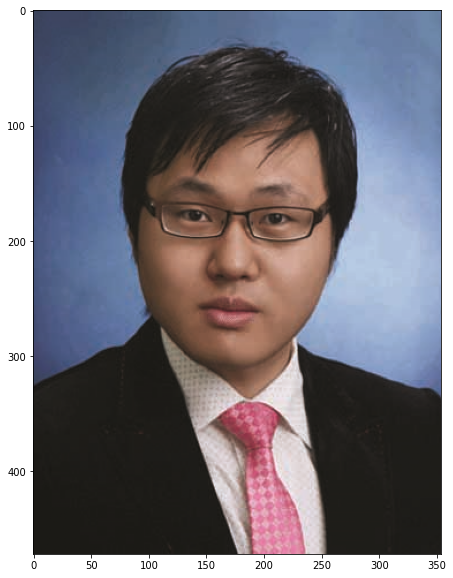

In [72]:
# 그림 (사진) 관련 모듈 임포트
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 가져올 사진 설정
img = mpimg.imread('leekh.png')

# 사진을 띄울 액자(?) 설정
plt.figure(figsize=(10,10))

# 액자에 사진 넣기
plt.imshow(img)

# 액자를 띄우기
plt.show()

In [7]:
import json

parsed = json.loads(response.text)   # 넘겨 받은 분석 결과 json을 딕셔너리로 변환
print(json.dumps(parsed, indent=4, ensure_ascii=False))
# ensure_ascii=False 한글 깨짐 방지

print(type(parsed))

{
    "info": {
        "size": {
            "width": 354,
            "height": 472
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 99,
                "y": 134,
                "width": 163,
                "height": 163
            },
            "landmark": {
                "leftEye": {
                    "x": 137,
                    "y": 175
                },
                "rightEye": {
                    "x": 208,
                    "y": 181
                },
                "nose": {
                    "x": 169,
                    "y": 219
                },
                "leftMouth": {
                    "x": 142,
                    "y": 259
                },
                "rightMouth": {
                    "x": 198,
                    "y": 262
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999969
            },
            

In [63]:
########################################################################################
# 분석 결과 데이터 정리를 위한 파이썬 기본 문법                                        #
########################################################################################

# dict
dict = {'Name': '이광훈','Age': 35, 'etc':['neutral','frontal_face']}

# 키값들만 출력
print(dict.keys())

# 밸류값들만 출력
print(dict.values())

# 키값을 이용한 밸류값 호출
print(dict['Name'])
print(dict.get('Name'))

print(dict.get('Gender')) # 없는 키값을 사용하면 None 나오고 에러가 발생하지 않는다.
# print(dict['Gender'])     없는 키값을 사용하면 에러 발생
print(dict.get('Gender','값이 없음'))  # 키값이 없을때의 출력 메시지까지 지정할 수 있다. 

dict_keys(['Name', 'Age', 'etc'])
dict_values(['이광훈', 35, ['neutral', 'frontal_face']])
이광훈
이광훈
None
값이 없음


In [68]:
######################### 적용 ####################################

# 네이버에 사진을 전송하여 넘겨 받은 분석 결과 json을 딕셔너리로 변환한 parsed

parsed.keys()

dict_keys(['info', 'faces'])

In [64]:
parsed['faces']
# 처음 보낸 이광훈 사진은 얼굴이 하나 라서 한명의 정보 리스트만 볼 수 있다.

[{'celebrity': {'confidence': 1.0, 'value': '설현'}}]

In [65]:
parsed['faces'][0]  # 여러명이 있을때 [0]로 접근한다.

{'celebrity': {'confidence': 1.0, 'value': '설현'}}

In [1]:
parsed['faces'][0]['roi']  # roi 사진에서의 얼굴의 위치 값

NameError: ignored

In [22]:
parsed['faces'][0]['gender'] # 성별 정보 추출

{'confidence': 0.999969, 'value': 'male'}

In [21]:
parsed['faces'][0]['age']  # 나이 정보 추출

{'confidence': 0.236071, 'value': '26~30'}

In [23]:
parsed['faces'][0]['emotion'] # 감정상태 정보 추출

{'confidence': 0.999999, 'value': 'neutral'}

In [38]:
# 전체 정보 종합 추출
# x,y,w,h = parsed['faces'][0]['roi'].values()

# 딕셔너리는 기본적으로 순서가 없다. unordered
# print(x) 
# print(y) 
# print(w) 
# print(h)  한번쯤은 값을 확인해야 한다.

x,y,w,h = parsed['faces'][0]['roi'].values()
gender, gender_c = parsed['faces'][0]['gender'].values()
print(gender)
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()

# values() 를 사용하여 값만 추출하고 그 값들을 개수에 맞게 변수로 받아 저장한다.
# 딕셔너리 특성상 순서가 다르게 나올 수 있기 때문에 한 번은 확인해야 한다. 


male


In [41]:
# 추출한 정보를 사진에 올리기 적합한 형태로 가공하자.

annot = gender + ' : ' + str(gender_c) + \
        '\n' + emotion + ' : ' + str(emotion_c) + \
        '\n' + age + ' : ' + str(age_c)

print(annot)

male	 : 0.999969
neutral	 : 0.999999
26~30	 : 0.236071


Text(99, 317, 'male\t : 0.999969\nneutral\t : 0.999999\n26~30\t : 0.236071')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


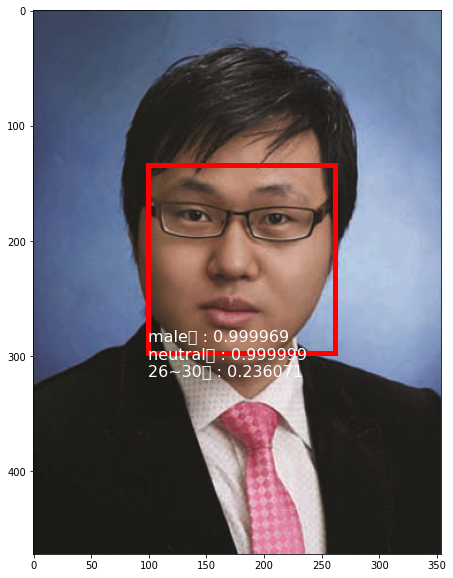

In [54]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 가져올 사진 설정
img = mpimg.imread('leekh.png')

# 사진을 띄울 액자(?) 설정
fig, ax = plt.subplots(figsize=(10,10))     # fig 액자, ax 수정한 사진의 크기 설정
ax.imshow(img)                              # 먼저 기본사진 

# 사진 수정
rect_face = patches.Rectangle((x,y),w,h,   # x,y 얼굴의 시작 지점, w,h 얼굴의 크기
                             linewidth = 5,
                              edgecolor = 'r',
                              facecolor = 'none')
ax.add_patch(rect_face)

plt.text(x,y+h+20, annot, fontsize = 16, color='white')




female


Text(169, 428, 'female : 0.999193\nneutral : 0.999999\n21~25 : 0.547127')

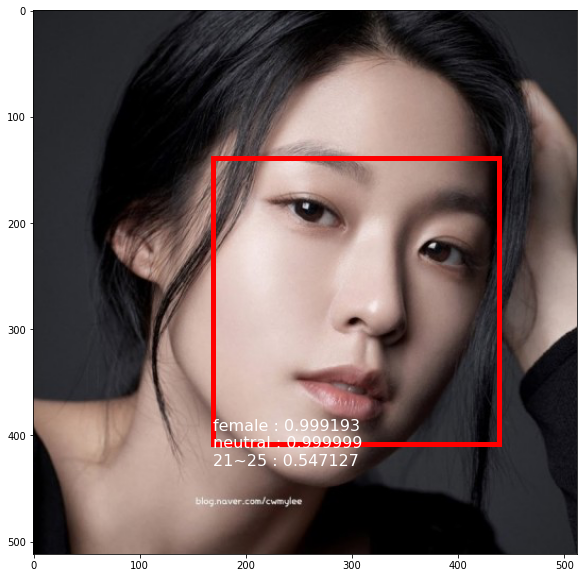

In [56]:
# 필요 모듈 읽어오기
import os
import sys
import requests
import json

# api 사용을 위한 개발자 정보
client_id = "804oegVah0qTIBSTwQfQ"
client_secret = "YM6jY1esfD"

# 사용할 api 주소 선택
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
#url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

# 인식할 사진 
files = {'image': open('s.jpg', 'rb')}

# id secret를 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api 주소로 전송하여 결과를 response로 받음 
response = requests.post(url,  files=files, headers=headers)
                        #(정보를 전달할 주소, 전달할 사진, 개발자 id secret)



parsed = json.loads(response.text)   # 넘겨 받은 분석 결과 json

# 사진에 정보 올리기
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x,y,w,h = parsed['faces'][0]['roi'].values()
gender, gender_c = parsed['faces'][0]['gender'].values()
print(gender)
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()

# 가져올 사진 설정
img = mpimg.imread('s.jpg')

# 사진을 띄울 액자(?) 설정
fig, ax = plt.subplots(figsize=(10,10))     # fig 액자, ax 수정한 사진의 크기 설정
ax.imshow(img)                              # 먼저 기본사진 

# 사진 수정
rect_face = patches.Rectangle((x,y),w,h,   # x,y 얼굴의 시작 지점, w,h 얼굴의 크기
                             linewidth = 5,
                              edgecolor = 'r',
                              facecolor = 'none')
ax.add_patch(rect_face)

annot = gender + ' : ' + str(gender_c) + \
        '\n' + emotion + ' : ' + str(emotion_c) + \
        '\n' + age + ' : ' + str(age_c)

plt.text(x,y+h+20, annot, fontsize = 16, color='white')



Text(169, 458, 'female : 0.999193\nneutral : 0.999999\n21~25 : 0.547127\n한글 테스트')

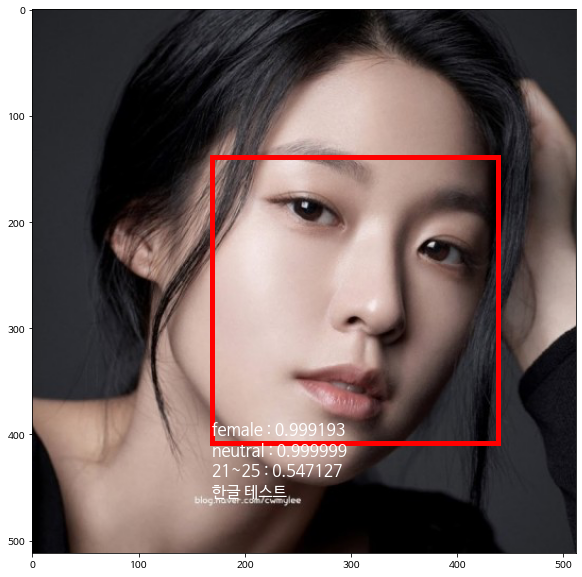

In [20]:
import os
import sys
import requests
import json

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 네이버에 사진 전송후 분석 결과 받기
client_id = "804oegVah0qTIBSTwQfQ"
client_secret = "YM6jY1esfD"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('s.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
parsed = json.loads(response.text)  # 넘겨 받은 분석 결과 json을 딕셔너리로 변환

# 사진에 정보 올리기
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x,y,w,h = parsed['faces'][0]['roi'].values()
gender, gender_c = parsed['faces'][0]['gender'].values()
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()


img = mpimg.imread('s.jpg')
fig, ax = plt.subplots(figsize=(10,10))   # fig 액자(?), ax 수정한 사진 의 크기 설정
ax.imshow(img)                            # 먼저 기본사진
rect_face = patches.Rectangle((x,y),w,h,  # x,y 얼굴의 시작지점, w, h 얼굴의 크기
                              linewidth = 5,
                              edgecolor = 'r',
                              facecolor = 'none')
ax.add_patch(rect_face)


annot = gender + ' : ' + str(gender_c) + \
        '\n'+ emotion + ' : ' + str(emotion_c) + \
        '\n'+ age + ' : ' + str(age_c) + \
        '\n'+ '한글 테스트'

plt.text(x,y+h+50, annot, fontsize = 16, color='white')

In [49]:
##############################################
# 여러 사람 사진 처리                        #
##############################################

import os
import sys
import requests
import json

client_id = "804oegVah0qTIBSTwQfQ"
client_secret = "YM6jY1esfD"

url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
#url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('n.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)


{"info":{"size":{"width":600,"height":400},"faceCount":7},"faces":[{"roi":{"x":252,"y":141,"width":28,"height":28},"landmark":{"leftEye":{"x":261,"y":148},"rightEye":{"x":272,"y":148},"nose":{"x":267,"y":155},"leftMouth":{"x":261,"y":160},"rightMouth":{"x":272,"y":161}},"gender":{"value":"male","confidence":0.995348},"age":{"value":"70~74","confidence":0.122167},"emotion":{"value":"talking","confidence":0.675631},"pose":{"value":"frontal_face","confidence":0.986913}},{"roi":{"x":177,"y":111,"width":23,"height":23},"landmark":{"leftEye":{"x":185,"y":118},"rightEye":{"x":195,"y":118},"nose":{"x":191,"y":122},"leftMouth":{"x":187,"y":130},"rightMouth":{"x":196,"y":128}},"gender":{"value":"female","confidence":0.992471},"age":{"value":"21~25","confidence":0.0444816},"emotion":{"value":"talking","confidence":0.822173},"pose":{"value":"frontal_face","confidence":0.991142}},{"roi":{"x":223,"y":96,"width":25,"height":25},"landmark":{"leftEye":{"x":230,"y":101},"rightEye":{"x":240,"y":101},"nos

In [50]:
# json을 딕셔너리로 바꿔줌
parsed = json.loads(response.text) 
print(type(parsed))

<class 'dict'>


In [51]:
parsed.keys()

dict_keys(['info', 'faces'])

In [52]:
parsed['info']  # 사진의 기본 - 정보 얼굴의 갯수 사진 전체 크기

{'faceCount': 7, 'size': {'height': 400, 'width': 600}}

In [53]:
parsed['faces']

[{'age': {'confidence': 0.122167, 'value': '70~74'},
  'emotion': {'confidence': 0.675631, 'value': 'talking'},
  'gender': {'confidence': 0.995348, 'value': 'male'},
  'landmark': {'leftEye': {'x': 261, 'y': 148},
   'leftMouth': {'x': 261, 'y': 160},
   'nose': {'x': 267, 'y': 155},
   'rightEye': {'x': 272, 'y': 148},
   'rightMouth': {'x': 272, 'y': 161}},
  'pose': {'confidence': 0.986913, 'value': 'frontal_face'},
  'roi': {'height': 28, 'width': 28, 'x': 252, 'y': 141}},
 {'age': {'confidence': 0.0444816, 'value': '21~25'},
  'emotion': {'confidence': 0.822173, 'value': 'talking'},
  'gender': {'confidence': 0.992471, 'value': 'female'},
  'landmark': {'leftEye': {'x': 185, 'y': 118},
   'leftMouth': {'x': 187, 'y': 130},
   'nose': {'x': 191, 'y': 122},
   'rightEye': {'x': 195, 'y': 118},
   'rightMouth': {'x': 196, 'y': 128}},
  'pose': {'confidence': 0.991142, 'value': 'frontal_face'},
  'roi': {'height': 23, 'width': 23, 'x': 177, 'y': 111}},
 {'age': {'confidence': 0.04027

In [54]:
parsed['faces'][0]

{'age': {'confidence': 0.122167, 'value': '70~74'},
 'emotion': {'confidence': 0.675631, 'value': 'talking'},
 'gender': {'confidence': 0.995348, 'value': 'male'},
 'landmark': {'leftEye': {'x': 261, 'y': 148},
  'leftMouth': {'x': 261, 'y': 160},
  'nose': {'x': 267, 'y': 155},
  'rightEye': {'x': 272, 'y': 148},
  'rightMouth': {'x': 272, 'y': 161}},
 'pose': {'confidence': 0.986913, 'value': 'frontal_face'},
 'roi': {'height': 28, 'width': 28, 'x': 252, 'y': 141}}

In [55]:
parsed['faces'][0]['roi']

{'height': 28, 'width': 28, 'x': 252, 'y': 141}

In [56]:
x,y,w,h = parsed['faces'][0]['roi'].values()
gender, gender_c = parsed['faces'][0]['gender'].values()
age, age_c = parsed['faces'][0]['age'].values()
emotion, emotion_c = parsed['faces'][0]['emotion'].values()



# 딕셔너리는 unordered 즉 순서가 없으므로 최초 한 번 출력되는 순서를 확인하여 수정한다. 

annot = gender + ' : ' + str(gender_c) + \
        '\n' + emotion + ' : ' + str(emotion_c) + \
        '\n' + age + ' : ' + str(age_c)
print(annot)




male : 0.995348
talking : 0.675631
70~74 : 0.122167


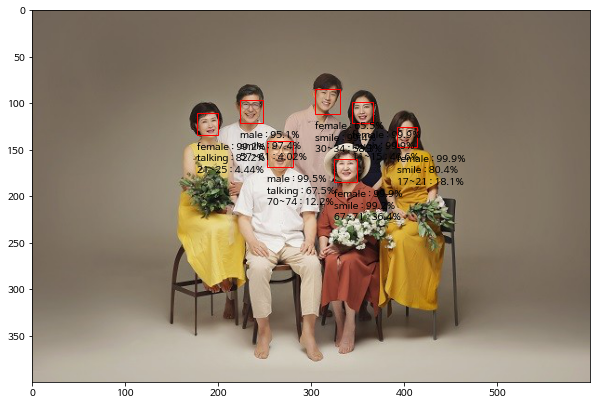

In [57]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('n.jpg')

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img)


for each in parsed['faces']:

  x,y,w,h = each['roi'].values()
  gender, gender_c = each['gender'].values()
  age, age_c = each['age'].values()
  emotion, emotion_c = each['emotion'].values()


  rect_face = patches.Rectangle((x,y),w,h,
                                linewidth=1,
                                edgecolor='r',
                                facecolor='none'
                                )
  ax.add_patch(rect_face)

  annot = gender + ' : ' + str(gender_c*100)[:4] +"%"+ \
        '\n' + emotion + ' : ' + str(emotion_c*100)[:4] +"%"+ \
        '\n' + age + ' : ' + str(age_c*100)[:4]+"%"
  

  plt.text(x,y+h+40, annot)

In [60]:
# 필요 모듈 읽어오기
import os
import sys
import requests

# api 사용을 위한 개발자 정보
client_id = "804oegVah0qTIBSTwQfQ"
client_secret = "YM6jY1esfD"

# 사용할 api 주소 선택
#url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

# 인식할 사진 
files = {'image': open('n.jpg', 'rb')}

# id secret를 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api 주소로 전송하여 결과를 response로 받음 
response = requests.post(url,  files=files, headers=headers)
                        #(정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)



{"info":{"size":{"width":600,"height":400},"faceCount":7},"faces":[{"celebrity":{"value":"문성혁","confidence":0.0742245}},{"celebrity":{"value":"한연","confidence":0.01}},{"celebrity":{"value":"신현탁","confidence":0.01}},{"celebrity":{"value":"김태연","confidence":0.352024}},{"celebrity":{"value":"이효춘","confidence":0.138955}},{"celebrity":{"value":"송지효","confidence":0.073002}},{"celebrity":{"value":"정재훈","confidence":0.01}}]}


In [61]:
parsed = json.loads(response.text) 
print(type(parsed))

<class 'dict'>


In [63]:
value, value_c = parsed['faces'][0]['celebrity'].values()
print(value)
print(value_c)

문성혁
0.0742245


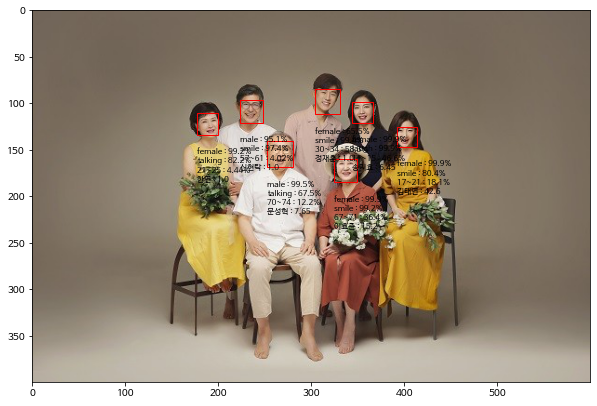

In [74]:
# 최종 버전 : 사진 분석 + 연예인 닮은꼴

import os
import sys
import requests

import matplotlib.patches as patches

client_id = "804oegVah0qTIBSTwQfQ"
client_secret = "YM6jY1esfD"

url1 = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
url2 = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

files1 = {'image': open('n.jpg', 'rb')}
files2 = {'image': open('n.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }


response1 = requests.post(url1,  files=files1, headers=headers)# 얼굴감지
response2 = requests.post(url2,  files=files2, headers=headers)# 유명인 얼굴인식

parsed1 = json.loads(response1.text)
parsed2 = json.loads(response2.text)

img = mpimg.imread('n.jpg')

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img)


for i in range(len(parsed1['faces'])):
  x,y,w,h = parsed1['faces'][i]['roi'].values()
  gender, gender_c = parsed1['faces'][i]['gender'].values()
  age, age_c = parsed1['faces'][i]['age'].values()
  emotion, emotion_c = parsed1['faces'][i]['emotion'].values()

  value, value_c = parsed2['faces'][i]['celebrity'].values()


  rect_face = patches.Rectangle((x,y),w,h,
                                linewidth=1,
                                edgecolor='r',
                                facecolor='none'
                                )
  ax.add_patch(rect_face)

  annot = gender + ' : ' + str(gender_c * 100)[:4] + "%" + \
        '\n' + emotion + ' : ' + str(emotion_c * 100)[:4] + "%" + \
        '\n' + age + ' : ' + str(age_c * 100)[:4] + "%" + \
        '\n' + value + ' : ' + str(value_c * 100)[:4]

  plt.text(x,y+h+50, annot, size=8)